## Eigenfaces

In this project, the focus is on image compression using Singular Value Decomposition (SVD), specifically following the principles of the well-known "Eigenfaces" experiment. The process involves representing a grayscale image \(M\) of size \(m \times n\) as an \(m \times n\) real matrix. SVD is then applied to obtain \(U\), \(S\), and \(V\) matrices. By utilizing the largest \(k\) singular values and corresponding singular vectors, a best rank-\(k\) approximation to \(M\) is achieved.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

In [73]:
# The following code returns the dataset of 400 images.
data = datasets.fetch_olivetti_faces()
images = data.images

(a) Given an $m \times n$ image $M$ and its rank-$k$ approximation $A$, we can measure the reconstruction error using mean $\ell_1$ error: $$ \text{error}_{\ell_1}(M, A) = \frac{1}{mn}\| M - A \|_1 = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}| M_{i,j} - A_{i,j} |. $$ For $k = 1, \dots, 30$, take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

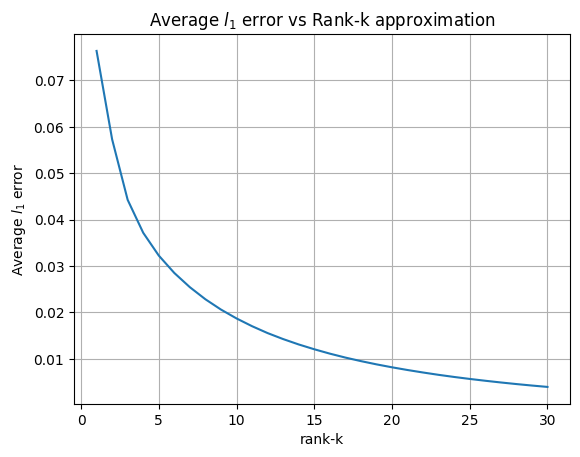

In [74]:
# Step 1: Define the svd_reconstruct function
def svd_reconstruct(M, k):
    """
    Returns the best rank-k approximation to M.
    
    Parameters:
    M (numpy.ndarray): Input matrix of shape (m, n)
    k (int): Rank for the approximation
    
    Returns:
    numpy.ndarray: Rank-k approximation of M
    """
    # Compute the SVD of M
    U, S, Vt = svd(M, full_matrices=False)
    
    # Retain only the k largest singular values (and corresponding vectors)
    S[k:] = 0
    
    # Reconstruct the rank-k approximation
    A = U @ np.diag(S) @ Vt
    
    return A

# Step 2: Define the l1_error function
def l1_error(M, A):
    """
    Returns the l1 error between M and A.
    
    Parameters:
    M (numpy.ndarray): Original matrix
    A (numpy.ndarray): Approximated matrix
    
    Returns:
    float: l1 error
    """
    m, n = M.shape
    error = np.sum(np.abs(M - A)) / (m * n)
    return error

# Step 3 & 4: Compute the rank-k approximation and l1 error for each k and each image
k_values = range(1, 31)
avg_errors = []

for k in k_values:
    errors = [l1_error(img, svd_reconstruct(img, k)) for img in images]
    avg_errors.append(np.mean(errors))

# Step 5: Plot the average l1 error as a function of k
plt.plot(k_values, avg_errors)
plt.xlabel('rank-k')
plt.ylabel('Average $l_1$ error')
plt.title('Average $l_1$ error vs Rank-k approximation')
plt.grid(True)
plt.show()


(b) Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$. The `imshow` method in matplotlib will be used for this.

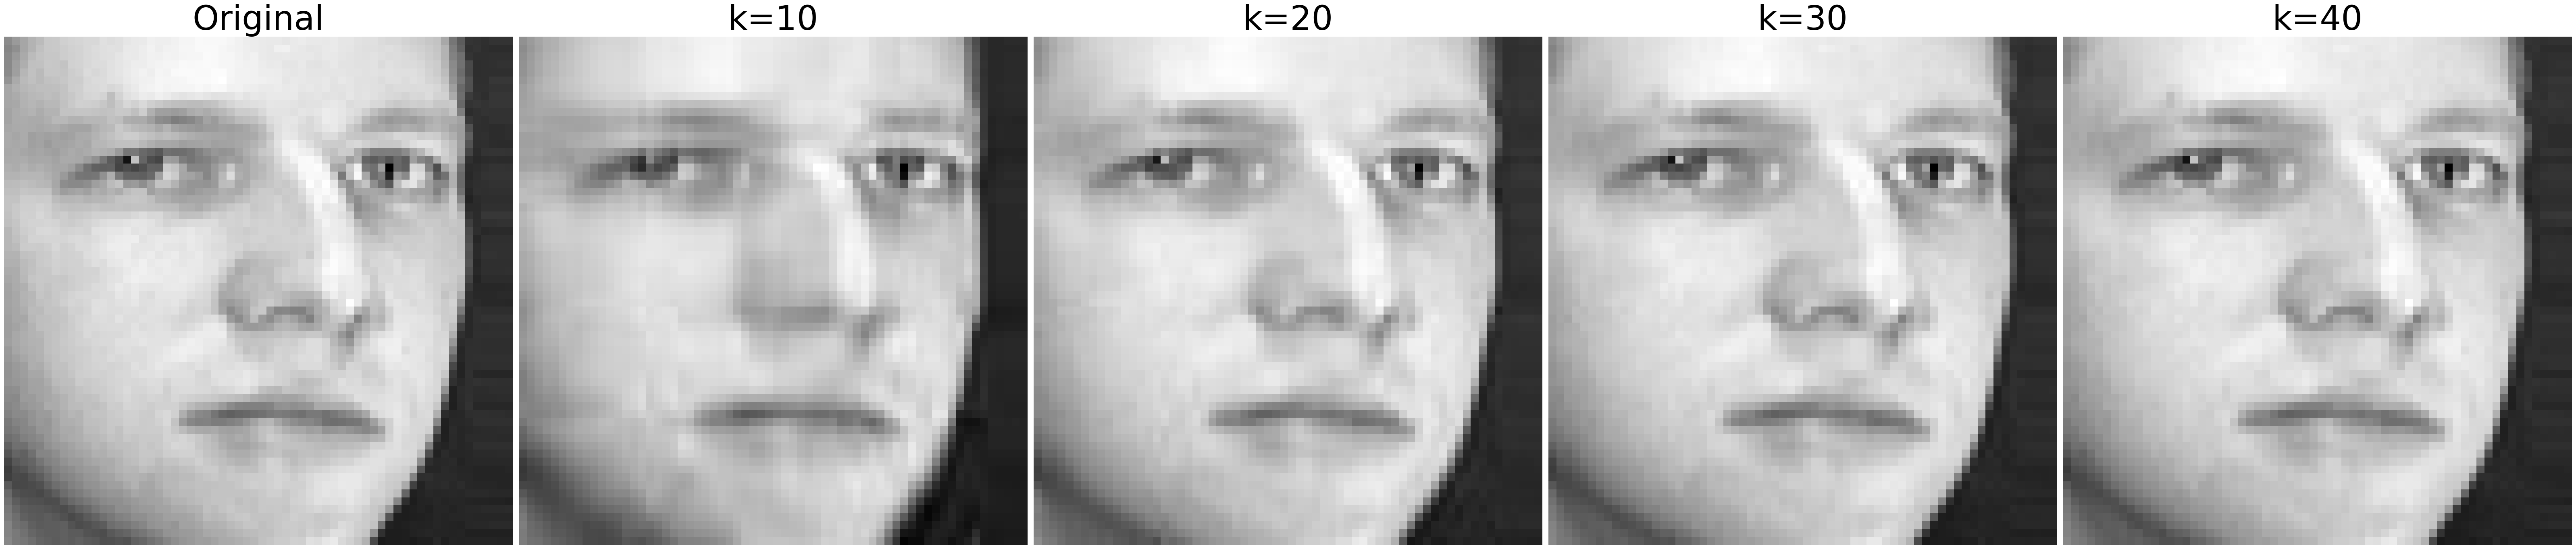

In [75]:
# Choose an image for the experiment (for example, the first image in the dataset)
image_index = 4
image = images[image_index]

# Define the rank values for the approximation
k_values = [10, 20, 30, 40]

# Create a subplot to display the original image and its approximations
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(64, 64))

# Display the original image
axes[0].imshow(image, cmap='gray') #to render in grayscale. 
axes[0].set_title('Original', fontsize=60)
axes[0].axis('off')

# Display the rank-k approximations
for i, k in enumerate(k_values):
    approximation = svd_reconstruct(image, k)
    axes[i + 1].imshow(approximation, cmap='gray')
    axes[i + 1].set_title(f'k={k}', fontsize=60)
    axes[i + 1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
